# "REFINING COMPUTER SALES STRATEGY THROUGH STATISTICAL ANALYSIS"

In [1]:
import pandas as pd

df=pd.read_csv("DS1_C8_Computers_Data_Project.csv")
df

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
0,1,1499,25,80,4,14,no,no,yes,94,94,1
1,2,1795,33,85,2,14,no,no,yes,94,94,1
2,3,1595,25,170,4,15,no,no,yes,94,94,1
3,4,1849,25,170,8,14,no,no,no,94,94,1
4,5,3295,33,340,16,14,no,no,yes,94,104,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,no,no,yes,39,70,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,70,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,70,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,70,35


In [2]:
df.shape

(6259, 12)

In [3]:
df.columns

Index(['index', 'price', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi',
       'premium', 'ads_2022', 'ads_2023', 'trend'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     6259 non-null   int64 
 1   price     6259 non-null   int64 
 2   speed     6259 non-null   int64 
 3   hd        6259 non-null   int64 
 4   ram       6259 non-null   int64 
 5   screen    6259 non-null   int64 
 6   cd        6259 non-null   object
 7   multi     6259 non-null   object
 8   premium   6259 non-null   object
 9   ads_2022  6259 non-null   int64 
 10  ads_2023  6259 non-null   int64 
 11  trend     6259 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 586.9+ KB


In [5]:
df.isnull().sum()

index       0
price       0
speed       0
hd          0
ram         0
screen      0
cd          0
multi       0
premium     0
ads_2022    0
ads_2023    0
trend       0
dtype: int64

In [6]:
NC= df.select_dtypes(exclude="object")
NC

,index,price,speed,hd,ram,screen,ads_2022,ads_2023,trend
0,1,1499,25,80,4,14,94,94,1
1,2,1795,33,85,2,14,94,94,1
2,3,1595,25,170,4,15,94,94,1
3,4,1849,25,170,8,14,94,94,1
4,5,3295,33,340,16,14,94,104,1
...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,39,70,35
6255,6256,2223,66,850,16,15,39,70,35
6256,6257,2654,100,1200,24,15,39,70,35
6257,6258,2195,100,850,16,15,39,70,35


In [7]:
CC= df.select_dtypes(include="object")
CC

,cd,multi,premium
0,no,no,yes
1,no,no,yes
2,no,no,yes
3,no,no,no
4,no,no,yes
...,...,...,...
6254,no,no,yes
6255,yes,yes,yes
6256,yes,no,yes
6257,yes,no,yes


In [8]:
n_list=list(NC.columns)
n_list

['index',
 'price',
 'speed',
 'hd',
 'ram',
 'screen',
 'ads_2022',
 'ads_2023',
 'trend']

In [9]:
c_list=list(CC.columns)
c_list

['cd', 'multi', 'premium']

In [10]:
from tabulate import tabulate
table=[n_list,c_list]
print(tabulate({"categorical":c_list,"numerical":n_list},headers=["categorical","numerical"]))

categorical    numerical
-------------  -----------
cd             index
multi          price
premium        speed
               hd
               ram
               screen
               ads_2022
               ads_2023
               trend


In [11]:
def info_of_cat(col):
    print(f"unique values in {col} are: {df[col].nunique()}") #unique will return the unique values of each column 
    print(f"mode values in{col} are : {df[col].mode()[0]}")#it will return the mode of a column
    print(f"number of missing values in{col} are : {df[col].isnull().sum()}")#it will return the count of missing values

# BUSINESS OBJECTIVE 1: ENHANCE PRODUCT STRATEGY AND SALES PERFORMANCE THROUGH SPECIFICATION-BASED ANALYSIS

# TASK-1: 

# a) ANALYZE PURCHASE LIKELIHOOD BASED ON SPECIFICATIONS

In [15]:
#Probability of a customer purchasing a computer with atleast 8 GB RAM, computer screen size of 14 inches and a processor speed exceeding 33 MHz

specifications= (df['ram'] >= 8) & (df['screen'] == 14) & (df['speed'] > 33)
matching_count = df[specifications].shape[0]
total_count = df.shape[0]
probability = (matching_count / total_count)*100
print(f"Number of matching computers: {matching_count}")
print(f"Total number of computers: {total_count}")
print(f"Probability: {probability:.2f}%")

Number of matching computers: 1003
Total number of computers: 6259
Probability: 16.02%


# b) PROBABILITY OF SELLING PREMIUM COMPUTERS

In [17]:
#i) Probability of selling premium computers

premium= df['premium'] == 'yes'
premium_count = df[premium].shape[0]
total_count = df.shape[0]
premium_probability = (premium_count / total_count) * 100

print(f"Number of premium computers: {premium_count}")
print(f"Total number of computers: {total_count}")
print(f"Probability of selling a premium computer: {premium_probability:.2f}%")

Number of premium computers: 5647
Total number of computers: 6259
Probability of selling a premium computer: 90.22%


In [18]:
#ii)The probability of having a CD player given it is premium

cd_and_premium = len(df[(df['cd'] == 'yes') & (df['premium'] == 'yes')]) / len(df)
# Calculating the probability of being premium
premium = len(df[df['premium'] == 'yes']) / len(df)
# The conditional probability of having a cd player given it is premium 
probability = (cd_and_premium / premium)*100

print(f"Probability that a computer has a CD player given that it is premium: {probability:.2f}%")

Probability that a computer has a CD player given that it is premium: 50.01%


# c) PREDICTING THE PROBABILITY OF CERTAIN SPECIFICATIONS

In [20]:
#i) The probability of having a computer size greater than 15 inches and being premium

size_and_premium= len(df[(df["screen"]>15) & (df["premium"]=="yes")])/len(df)
premium= len(df[df['premium'] == 'yes']) / len(df)
probability=(size_and_premium/premium)*100

print(f"Probability that a computer has a size greater than 15 inches given that it is premium: {probability:.2f}%")

Probability that a computer has a size greater than 15 inches given that it is premium: 9.39%


In [21]:
#ii)Probability that a computer has a screen size <= 14 inches given that it is not premium

screen_less_14_and_not_premium = len(df[(df['screen'] <= 14) & (df['premium'] == 'no')]) / len(df)
#The probability of not being premium
not_premium = len(df[df['premium'] == 'no']) / len(df)
#The conditional probability that it has a screen size less than or equal to 14 inches given it is not premium
probability = (screen_less_14_and_not_premium / not_premium)*100

print(f"Probability that a computer has a screen size <= 14 inches given that it is not premium: {probability:.2f}%")

Probability that a computer has a screen size <= 14 inches given that it is not premium: 69.12%


# d) LIKELIHOOD OF COMPUTERS HAVING BOTH CD PLAYER AND A MULTIMEDIA KIT

In [23]:
#i)The joint probability of computers having both a cd player and a multimedia kit

cd_and_multi = len(df[(df['cd'] == 'yes') & (df['multi'] == 'yes')]) / len(df)
cd_and_multi=(cd_and_multi)*100
print(f"Joint probability of having both a CD player and a multimedia kit: {cd_and_multi:.2f}%")

Joint probability of having both a CD player and a multimedia kit: 13.95%


In [24]:
#ii)Probability that a computer has a multimedia kit given that it has a CD player

cd_and_multi = len(df[(df['cd'] == 'yes') & (df['multi'] == 'yes')]) / len(df)
cd_player = len(df[df['cd'] == 'yes']) / len(df)
probability = (cd_and_multi / cd_player)*100

print(f"Probability that a computer has a multimedia kit given that it has a CD player: {probability:.2f}%")

Probability that a computer has a multimedia kit given that it has a CD player: 30.02%


# BUSINESS OBJECTIVE 2: ASSESSING PRICE DISPARITIES BETWEEN PREMIUM AND NON-PREMIUM COMPUTERS AS COMPARED TO PRICES OF BOTH CATEGORIES TOGETHER

# TASK-2: 

In [27]:
import statistics as st
import math
from scipy.stats import norm

# a) Average size of computers in the entire population

In [29]:
screen_sizes = df['screen'].tolist()
average_screen_size = st.mean(screen_sizes)

print(f"Average size of computers in the entire population: {average_screen_size:.2f} inches")

Average size of computers in the entire population: 14.61 inches


# b) Variation of average prices of samples using different sample techniques

# Simple Random Sampling

In [32]:
srs_sample = df.sample(n=400, random_state=42)  # Randomly sample 5
srs_mean = st.mean(srs_sample['price'])
srs_mean

2230.57

# Systematic Sampling

In [34]:
k = 400  # Interval 
systematic_sample = df.iloc[::k] 
systematic_mean = st.mean(systematic_sample['price'])
systematic_mean

2129.5

# Stratified Sampling

In [36]:
grouped_price_df= df.groupby(["price"])
prices=df.price.unique()
strata_sample_df= []

In [37]:
import warnings
warnings.filterwarnings("ignore")
for p in prices:
    p_data=grouped_price_df.get_group(p)
    #print(p_data)
    sample_data=p_data.sample(n=400,replace=True,random_state=1)
    #print(sample_data)
    strata_sample_df.append(sample_data)

In [38]:
strata_sample_df=pd.concat(strata_sample_df,ignore_index=True)
strata_sample_df

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
0,4501,1499,33,340,4,15,yes,yes,yes,205,205,21
1,1138,1499,33,130,4,14,no,no,yes,298,298,8
2,638,1499,25,170,4,14,no,no,yes,176,176,6
3,306,1499,25,170,4,14,no,no,yes,108,108,4
4,5924,1499,50,545,4,15,yes,no,yes,129,129,29
...,...,...,...,...,...,...,...,...,...,...,...,...
323195,6132,1870,100,540,8,15,no,no,yes,51,51,32
323196,6132,1870,100,540,8,15,no,no,yes,51,51,32
323197,6132,1870,100,540,8,15,no,no,yes,51,51,32
323198,6132,1870,100,540,8,15,no,no,yes,51,51,32


In [39]:
stratified_mean=st.mean(strata_sample_df["price"])
stratified_mean

2407.7995049504952

# Stratified Sampling (assuming two strata: below and above 1000)

In [41]:
strata_1 = df[df['price'] <= 1000]
strata_2 = df[df['price'] > 1000]
strata_1_sample = strata_1.sample(n=400,replace=True, random_state=42)
strata_2_sample = strata_2.sample(n=400,replace=True, random_state=42)
stratified_sample = pd.concat([strata_1_sample, strata_2_sample])
stratified_mean1 = st.mean(stratified_sample['price'])
stratified_mean1

1598.615

# Cluster Sampling

In [43]:
import random

# Cluster Sampling (assuming 2 clusters)

cluster_1 = df.iloc[:4500]
cluster_2 = df.iloc[4500:]
cluster_sample = random.choice([cluster_1, cluster_2])
cluster_mean = st.mean(cluster_sample['price'])
cluster_mean

2050.951677089255

In [44]:
print(f"SRS Mean: {srs_mean:.2f}")
print(f"Systematic Sampling Mean: {systematic_mean:.2f}")
print(f"Stratified Sampling Mean: {stratified_mean:.2f}")
print(f"Cluster Sampling Mean: {cluster_mean:.2f}")

SRS Mean: 2230.57
Systematic Sampling Mean: 2129.50
Stratified Sampling Mean: 2407.80
Cluster Sampling Mean: 2050.95


In [45]:
Conclusion="""
The variation in means suggests that:

SRS provides a reliable baseline but is subject to random variability.
Systematic Sampling may underrepresent or overrepresent certain segments if patterns exist in the data.
Stratified Sampling generally offers the most precision when strata are well-chosen but may overestimate or underestimate the mean if the strata weights are not proportional.
Cluster Sampling depends heavily on the representativeness of the selected clusters and might not capture population-wide diversity.

To choose the best sampling method:
We should use stratified sampling for populations with known subgroups.
Prefer SRS for simplicity and unbiased results if subgroup information is unavailable.
Avoid systematic and cluster sampling unless their limitations are addressed."""

print(Conclusion)


The variation in means suggests that:

SRS provides a reliable baseline but is subject to random variability.
Systematic Sampling may underrepresent or overrepresent certain segments if patterns exist in the data.
Stratified Sampling generally offers the most precision when strata are well-chosen but may overestimate or underestimate the mean if the strata weights are not proportional.
Cluster Sampling depends heavily on the representativeness of the selected clusters and might not capture population-wide diversity.

To choose the best sampling method:
We should use stratified sampling for populations with known subgroups.
Prefer SRS for simplicity and unbiased results if subgroup information is unavailable.
Avoid systematic and cluster sampling unless their limitations are addressed.


# c) Comparison of average prices of premium and non-premium computers' sampled data without replacement

In [47]:
import pandas as pd

# 1. Calculating average prices for the whole dataset
premium_avg = st.mean(df[df['premium'] == 'yes']['price'])
non_premium_avg = st.mean(df[df['premium'] == 'no']['price'])

print(f"Population Average Price (Premium): {premium_avg:.2f}")
print(f"Population Average Price (Non-Premium): {non_premium_avg:.2f}")

# 2. Simple Random Sampling Without Replacement
premium_sample = df[df['premium'] == 'yes'].sample(n=400, random_state=1, replace=False)
non_premium_sample = df[df['premium'] == 'no'].sample(n=400, random_state=1, replace=False)

premium_sample_avg = st.mean(premium_sample['price'])
non_premium_sample_avg =st.mean(non_premium_sample['price'])

print(f"Sample Average Price (Premium, SRSWOR): {premium_sample_avg:.2f}")
print(f"Sample Average Price (Non-Premium, SRSWOR): {non_premium_sample_avg:.2f}")

# 3. Comparing the differences
premium_diff = premium_sample_avg - premium_avg
non_premium_diff = non_premium_sample_avg - non_premium_avg

print(f"Difference in Premium Average (Sample - Population): {premium_diff:.2f}")
print(f"Difference in Non-Premium Average (Sample - Population): {non_premium_diff:.2f}")


Population Average Price (Premium): 2204.15
Population Average Price (Non-Premium): 2361.93
Sample Average Price (Premium, SRSWOR): 2272.21
Sample Average Price (Non-Premium, SRSWOR): 2321.56
Difference in Premium Average (Sample - Population): 68.06
Difference in Non-Premium Average (Sample - Population): -40.38


# d) Interpretation

# BUSINESS OBJECTIVE 3: UNDERSTANDING COMPUTER PRICE TRENDS THROUGH DISTRIBUTION ANALYSIS

# TASK-3

# a) VARIATION OF SAMPLE MEANS OF DIFFERENT SAMPLE SIZES OF PRICES AND THEIR DISTRIBUTION

In [64]:
#Population parameters
import statistics as st
import scipy.stats as sts

data_p=df["price"].tolist()

p_mean=st.mean(data_p)
p_median=st.median(data_p)
p_sd=st.stdev(data_p)

print("Population mean is:", p_mean)
print("Population median is:", p_median)
print("Population Standard deviation  is:", p_sd)
print("Population skewness is:",sts.skew(data_p,bias=False))
print("Population kurtosis is:",sts.kurtosis(data_p,bias=False))

Population mean is: 2219.576609682058
Population median is: 2144
Population Standard deviation  is: 580.8039556527063
Population skewness is: 0.7117247480608602
Population kurtosis is: 0.7304170367653207


Text(0, 0.5, 'Frequency')

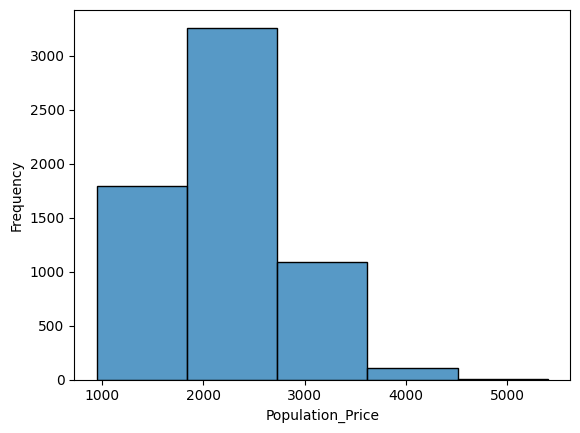

In [52]:
import matplotlib.pyplot as plt
import seaborn as sb

population_price_df=df[("price")]
sb.histplot(population_price_df, bins=5)
plt.xlabel("Population_Price")
plt.ylabel("Frequency")

In [78]:
price_df=df["price"]
sd_100=price_df.sample(n=100,replace=True, random_state=1)
sd_200=price_df.sample(n=200,replace=True, random_state=1)
sd_300=price_df.sample(n=300,replace=True, random_state=1)
sd_400=price_df.sample(n=400,replace=True, random_state=1)
sd_500=price_df.sample(n=500,replace=True, random_state=1)
sd_600=price_df.sample(n=600,replace=True, random_state=1)
sd_1000=price_df.sample(n=1000,replace=True, random_state=1)
sd_2000=price_df.sample(n=2000,replace=True, random_state=1)
sd_3000=price_df.sample(n=3000,replace=True, random_state=1)
sd_4000=price_df.sample(n=4000,replace=True, random_state=1)
sd_5000=price_df.sample(n=5000,replace=True, random_state=1)
sd_6000=price_df.sample(n=6000,replace=True, random_state=1)
sd_7000=price_df.sample(n=7000,replace=True, random_state=1)
print("===============sample size = 100========================")
print(sd_100)
print("===============sample size = 200========================")
print(sd_200)
print("===============sample size = 300========================")
print(sd_300)
print("===============sample size = 400========================")
print(sd_400)
print("===============sample size = 500========================")
print(sd_500)
print("===============sample size = 1000========================")
print(sd_1000)
print("===============sample size = 2000========================")
print(sd_2000)
print("===============sample size = 3000========================")
print(sd_3000)
print("===============sample size = 4000========================")
print(sd_4000)
print("===============sample size = 5000========================")
print(sd_5000)
print("===============sample size = 6000========================")
print(sd_6000)
print("===============sample size = 7000========================")
print(sd_7000)

===============sample size = 100========================
5157    1758
235     2295
3980    2095
5192    1528
905     1899
        ... 
1869    1744
1795    1644
2944    2645
5373    2339
461     1790
Name: price, Length: 100, dtype: int64
===============sample size = 200========================
5157    1758
235     2295
3980    2095
5192    1528
905     1899
        ... 
3374    1395
4509    2593
4159    3190
843     2644
5667    2328
Name: price, Length: 200, dtype: int64
===============sample size = 300========================
5157    1758
235     2295
3980    2095
5192    1528
905     1899
        ... 
1880    1890
4014    2145
4662    3290
2574    1299
4813    1790
Name: price, Length: 300, dtype: int64
===============sample size = 400========================
5157    1758
235     2295
3980    2095
5192    1528
905     1899
        ... 
2559    1395
2562    1744
1820    2995
3790    3095
715     1495
Name: price, Length: 400, dtype: int64
===============sample size = 500============

In [80]:
sd_100_mean=st.mean(sd_100)
sd_200_mean=st.mean(sd_200)
sd_300_mean=st.mean(sd_300)
sd_400_mean=st.mean(sd_400)
sd_500_mean=st.mean(sd_500)
sd_1000_mean=st.mean(sd_1000)
sd_2000_mean=st.mean(sd_2000)
sd_3000_mean=st.mean(sd_3000)
sd_4000_mean=st.mean(sd_4000)
sd_5000_mean=st.mean(sd_5000)
sd_6000_mean=st.mean(sd_6000)
sd_7000_mean=st.mean(sd_7000)

print("===============sample size = 100========================")
print("sample_mean_100:",sd_100_mean)
print("===============sample size = 200========================")
print("sample_mean_200:",sd_200_mean)
print("===============sample size = 300========================")
print("sample_mean_300:",sd_300_mean)
print("===============sample size = 400========================")
print("sample_mean_400:",sd_400_mean)
print("===============sample size = 500========================")
print("sample_mean_500:",sd_500_mean)
print("===============sample size = 1000========================")
print("sample_mean_1000:",sd_1000_mean)
print("===============sample size = 2000========================")
print("sample_mean_2000:",sd_2000_mean)
print("===============sample size = 3000========================")
print("sample_mean_3000:",sd_3000_mean)
print("===============sample size = 4000========================")
print("sample_mean_4000:",sd_4000_mean)
print("===============sample size = 5000========================")
print("sample_mean_5000:",sd_5000_mean)
print("===============sample size = 6000========================")
print("sample_mean_6000:",sd_6000_mean)
print("===============sample size = 7000========================")
print("sample_mean_7000:",sd_7000_mean)

===============sample size = 100========================
sample_mean_100: 2181.61
===============sample size = 200========================
sample_mean_200: 2202.775
===============sample size = 300========================
sample_mean_300: 2184.8766666666666
===============sample size = 400========================
sample_mean_400: 2194.345
===============sample size = 500========================
sample_mean_500: 2212.25
===============sample size = 1000========================
sample_mean_1000: 2227.662
===============sample size = 2000========================
sample_mean_2000: 2213.7805
===============sample size = 3000========================
sample_mean_3000: 2217.038666666667
===============sample size = 4000========================
sample_mean_4000: 2221.1745
===============sample size = 5000========================
sample_mean_5000: 2221.2752
===============sample size = 6000========================
sample_mean_6000: 2219.3625
===============sample size = 7000=====================

# b) DISTRIBUTION OF SAMPLE MEANS' APPROXIMATING A NORMAL DISTRIBUTION

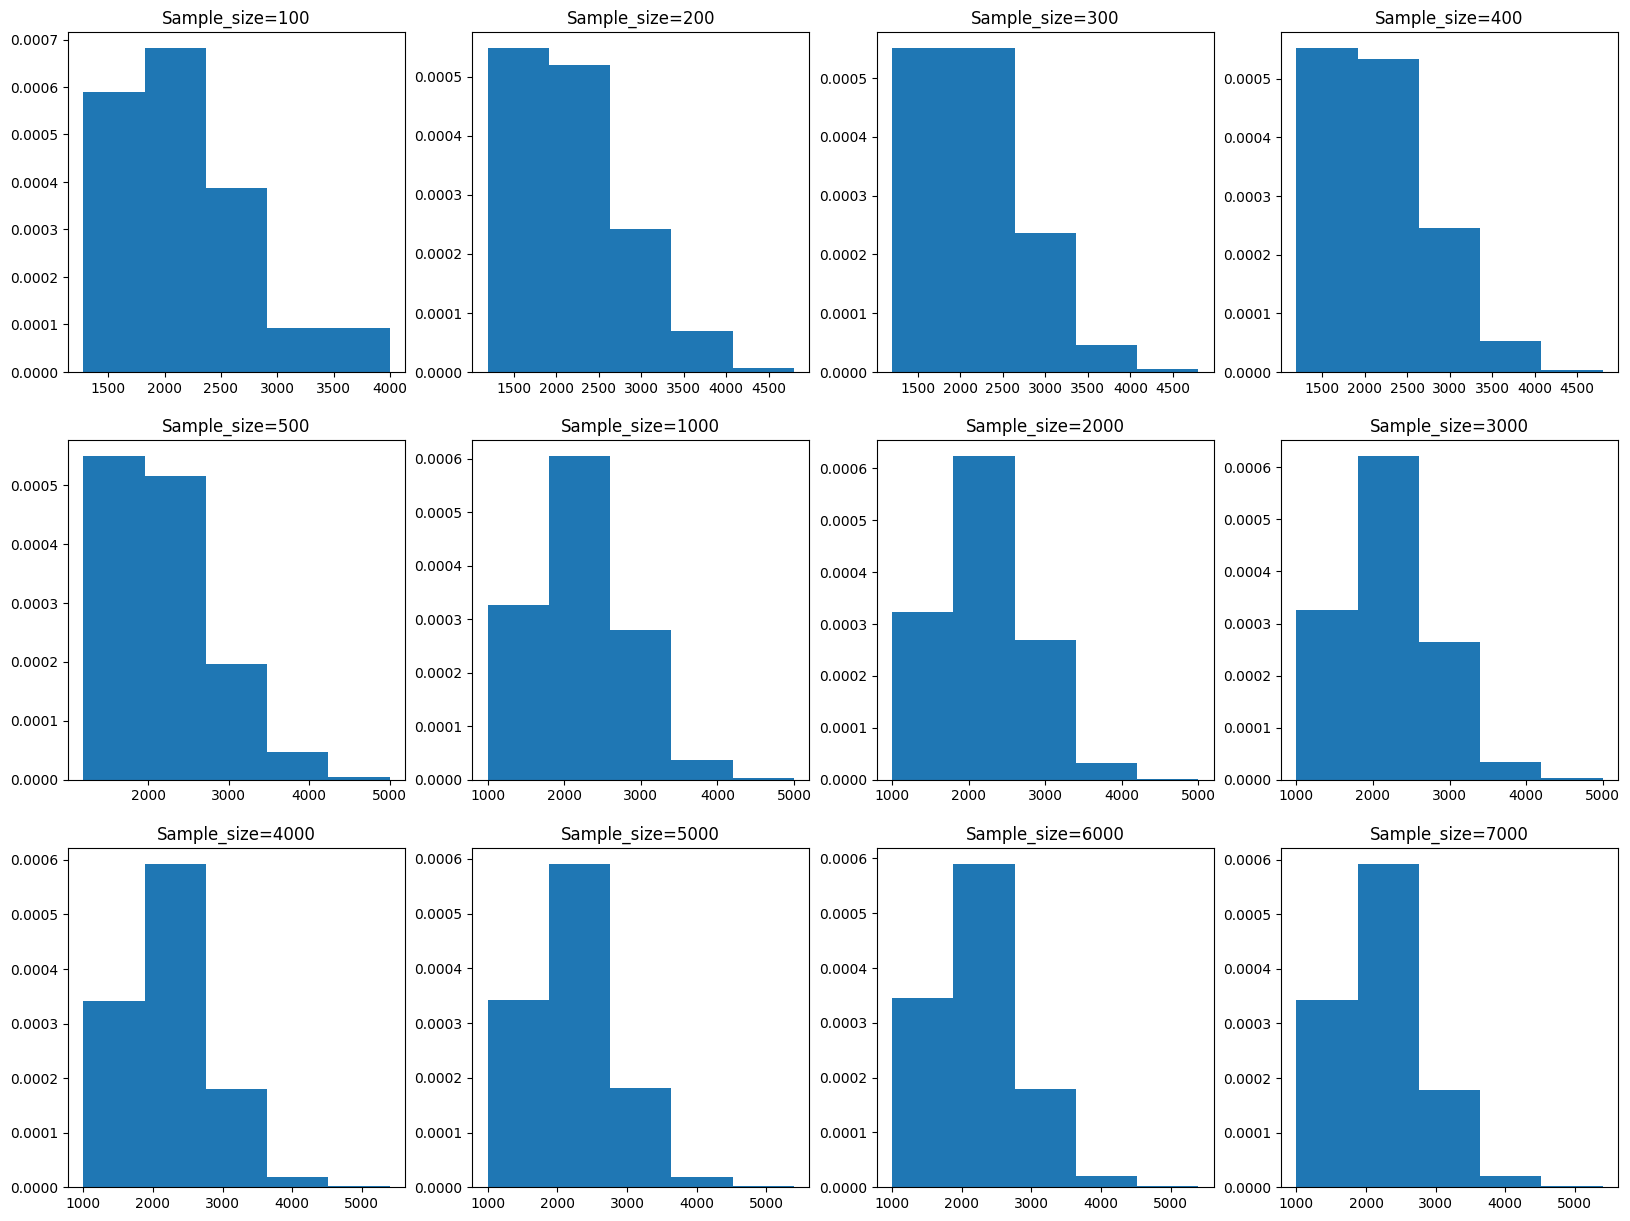

In [76]:
num=[100,200,300,400,500,1000,2000,3000,4000,5000,6000,7000]
data_s=[]
sample_df=pd.DataFrame

fig,ax=plt.subplots(3,4, figsize=(20,15))
for i in num:
    sample_df= df.sample(n=i,replace=True,random_state=1)
    data_s.append(sample_df["price"].tolist())

k=0 #(count)
for i in range(0,3):
    for j in range(0,4):
        ax[i,j].hist(data_s[k],5,density=True) # 5 is bin size
        ax[i,j].set_title(label="Sample_size="+str(len(data_s[k])))
        k=k+1
plt.show()  

# c) PROVING THE SATISFACTION OF CENTRAL LIMIT THEOREM FOR THE SAMPLES

In [ ]:
Central Limit Theorem Properties

Sampling Distribution of the Mean Approximates Normality:
As the sample size increases, the distribution of the sample means should approach a normal distribution, regardless of the population's original distribution.

Mean of Sample Means Approaches Population Mean:
The average of the sample means should converge to the population mean as the sample size increases.


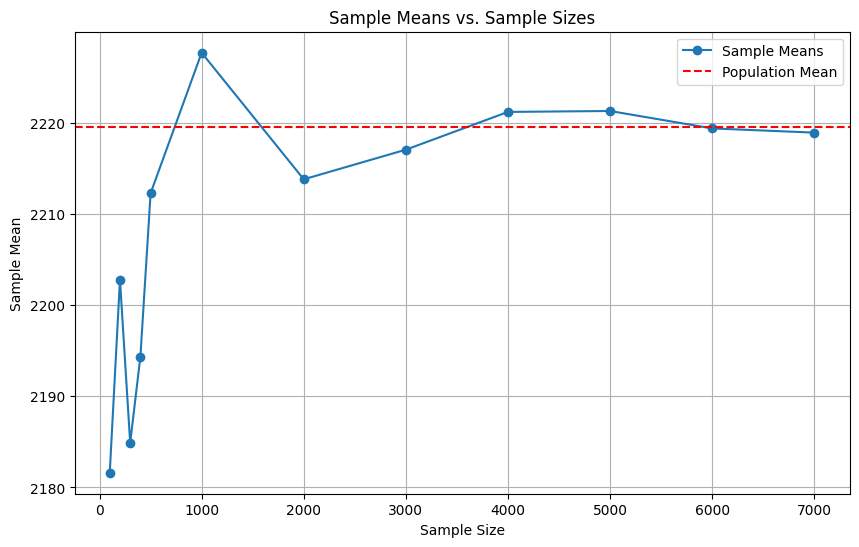

In [94]:
import numpy as np
import matplotlib.pyplot as plt

# Sample means
sample_sizes = [100, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000]
sample_means = [2181.61, 2202.775, 2184.876, 2194.34, 2212.25, 
                2227.66, 2213.78, 2217.03, 2221.17, 
                2221.27, 2219.36, 2218.90]

# Population mean
population_mean = 2219.57

# Plotting sample means against sample sizes
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, sample_means, marker='o', label="Sample Means")
plt.axhline(y=population_mean, color='r', linestyle='--', label="Population Mean")
plt.title("Sample Means vs. Sample Sizes")
plt.xlabel("Sample Size")
plt.ylabel("Sample Mean")
plt.legend()
plt.grid()
plt.show()